(complex-trace-page)=
# Complex trace attributes

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [2]:
%matplotlib inline

plt.show()

In [3]:
plt.rcParams.update({'lines.linewidth': 2.0, 'figure.figsize': [8.0, 5.0],
                     'axes.grid' : True, 'grid.linestyle': ":", 'grid.alpha': 0.7, 'lines.markersize': 5})

COLOR_ax = [0.15,0.15,0.15]
mpl.rcParams['text.color'] = COLOR_ax
mpl.rcParams['axes.labelcolor'] = COLOR_ax
mpl.rcParams['xtick.color'] = COLOR_ax
mpl.rcParams['ytick.color'] = COLOR_ax

colorlist_Iceland = np.array([[5, 100, 113], [253, 170, 0], [80, 63, 88], [134, 172, 25], [76, 166, 193], [157, 110, 51], [43, 63, 85]])/255.0
# colorlist_Iceland = np.array([[50, 70, 110], [150, 192, 25], [157, 110, 51], [5, 100, 113], [80, 63, 88], [76, 166, 193], [253, 170, 0]])/255.0
colorlist_Iceland = np.array([[50, 70, 110], [203, 150, 0], [157, 110, 51], [134, 172, 25], [76, 166, 193], [157, 110, 51], [43, 63, 85]])/255.0

colorlist_Iceland = ['#377eb8', '#ff7f00', '#4daf4a', '#984ea3']
colorlist_Iceland = ['#32466e', '#FFA024', '#96c019', '#bb5566', '#44aa99', '#88ccee', '#ffcccc']

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color = colorlist_Iceland) 

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Introduction 🎍

In this page, we are going to compute and discuss attributes of complex seismic trace. These attributes are quite useful, even popular, in seismic interpretation.

A *complex trace* is a mathematical abstraction. In reality, seismic data are represented by real numbers, not complex. Consequently, we need to add something 'imaginary' to the data in order to obtain a *complex* seismic trace. What is this imaginary part? For complex seismic trace, the imaginary part is a result of [Hilbert transform](https://en.wikipedia.org/wiki/Hilbert_transform) applied to the original trace. In frequency domain, Hilbert transform means rotating the phase of signal by 90°. It is fairly intuitive and can be easily computed. This phase-rotated signal is aslo referred to as *quadrature trace*.

Thus, complex trace $F(t)$ can be represented by the following equation:

$$
F(t) = f(t) + if^*(t)
$$

Here, $f(t)$ is real trace (a normal, usual seismic trace), $f^*(t)$ stands for Hilbert transform of $f(t)$.

It turns out that this combination is vivid and illustrative, and we will show it later. More than that, the amplitude and phase of complex trace describe several important properties of seismic data. They contain details related to subsurface, and that explains their popularity.


:::{seealso}

- [Arthur E. Barnes, "Handbook of Poststack Seismic Attributes", SEG, 2016](https://doi.org/10.1190/1.9781560803324) (Chapter 4 of the book is devoted to complex trace analysis with a thorough description of all details)
- [M. T. Taner, F. Koehler, and R. E. Sheriff, (1979), "Complex seismic trace analysis", GEOPHYSICS 44: 1041-1063.](https://doi.org/10.1190/1.1440994)
- [J. D. Robertson and D. A. Fisher, (1988), "Complex seismic trace attributes", The Leading Edge 7: 22-26.](https://doi.org/10.1190/1.1439517)
- [Complex numbers (Wikipedia)](https://en.wikipedia.org/wiki/Complex_number)
- [Hilbert transform (Wikipedia)](https://en.wikipedia.org/wiki/Hilbert_transform)

:::

## Objectives 🎯
1. Import a seismic trace
2. Apply Hilbert transform, compute a complex trace
3. Compute complex trace attributes
4. Fourier spectrum of a complex trace


## Import a trace 📥

For this experiment, I have a real seismic trace in ASCII text format. It can be imported with `np.loadtxt`.

In [4]:
import numpy as np
from numpy import pi, exp, sin, cos

path = r'.\Data\trc.txt'
time_and_trace = np.loadtxt(path)

In [5]:
time_and_trace[:10]

array([[ 0.00e+00,  0.00e+00],
       [ 1.00e+00, -9.00e-03],
       [ 2.00e+00, -4.10e-02],
       [ 3.00e+00, -9.90e-02],
       [ 4.00e+00, -1.71e-01],
       [ 5.00e+00, -2.39e-01],
       [ 6.00e+00, -2.90e-01],
       [ 7.00e+00, -3.21e-01],
       [ 8.00e+00, -3.43e-01],
       [ 9.00e+00, -3.56e-01]])

The file contains two columns: the first one is time in milliseconds, the second is amplutide. Sample rate for this trace is 1 ms.

In [6]:
t = time_and_trace[:, 0]
trace = time_and_trace[:, 1]

NSamples = len(t)
dt = t[1] - t[0]

Here is the trace:

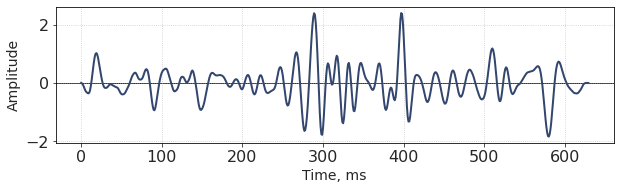

In [7]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize = [10,2.5])

plt.plot(t, trace)
plt.xlabel('Time, ms')
plt.ylabel('Amplitude')
plt.axhline(0, lw=1, c='#333333', zorder = 0)
plt.show()

## A complex trace 🪢

Conveniently, `scipy` library has Hilbert trasform implemented in function `scipy.signal.hilbert`. It returns a complex trace: its real part equals to the original signal and imaginary part is the quadrature trace.

In [8]:
from scipy.signal import hilbert

In [9]:
complex_trace = hilbert(trace)
quadr_trace = np.imag(complex_trace)

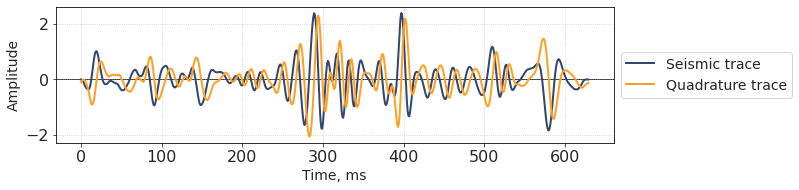

In [10]:
f, ax = plt.subplots(figsize = [10, 2.5])

plt.plot(t, trace, lw = 2, label = 'Seismic trace')
plt.plot(t, quadr_trace, label = 'Quadrature trace')
plt.xlabel('Time, ms')
plt.ylabel('Amplitude')
plt.legend(bbox_to_anchor=(1.00,0.5), loc="center left")
plt.axhline(0, lw=1, c='#333333', zorder = 0)
plt.show()

Thinking of seismic trace and quadrature trace as parts of a complex number, we can plot them in 3D axes:

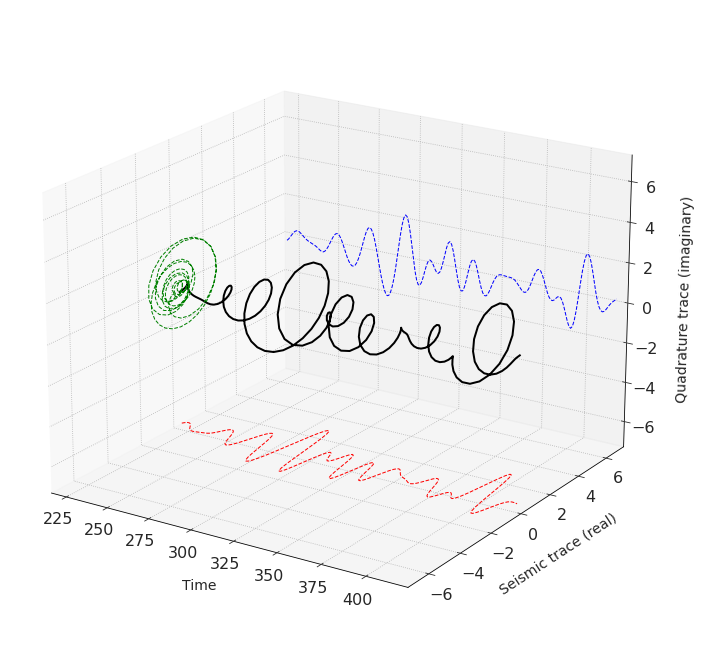

In [11]:
fig = plt.figure(figsize = [12,12])
ax = plt.axes(projection='3d', azim = -57, elev = 20)

plot_indices_3d = range(220,420)
x = trace[plot_indices_3d]
y = quadr_trace[plot_indices_3d]
tt = t[plot_indices_3d]

xymax = 7

ax.plot3D(tt, x, y, 'k', lw = 2)
ax.plot3D(tt, xymax+0*x, y, 'b', ls='--', lw = 1)
ax.plot3D(tt, x, -xymax+0*y, 'r', ls='--', lw = 1)
ax.plot3D(0*tt + np.min(tt), x, y, 'g', ls='--', lw = 1)

ax.set_xlim(np.min(tt), np.max(tt))
ax.set_ylim(-xymax, xymax)
ax.set_zlim(-xymax, xymax)
ax.set_xlabel(r'Time', labelpad = 14)
ax.set_ylabel('Seismic trace (real)', labelpad = 14)
ax.set_zlabel('Quadrature trace (imaginary)', labelpad = 14)

plt.show()

## Complex trace attributes ➿

### Instantaneous amplitude

Instantaneous amplitude (or amplitude envelope) can be thought of as a measure of amplitude intensity. According to [A. E. Barnes](https://doi.org/10.1190/1.9781560803324), "At a given time, it represents the magnitude of the sinusoid that best matches the seismic trace in a small window about that time". Another fact about instantaneous amplitude: at each time sample, it equals the maximum amplitude that can be reached by constant phase rotation of trace, hence the name "envelope".

Instantaneous amplitude is the absolute value (modulus) of the complex trace:

$$
\mathrm{IA} = |z|=\sqrt{x^2+y^2}
$$

where $x$ is the seismic trace, $y$ is quadrature trace 

In [12]:
inst_amp = np.abs(complex_trace)

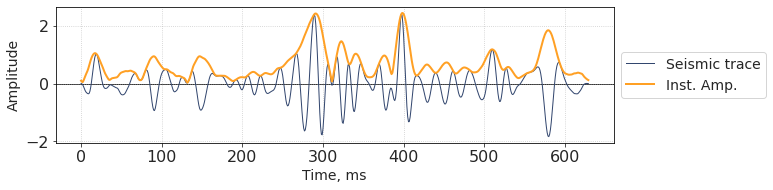

In [13]:
f, ax = plt.subplots(figsize = [10, 2.5])

plt.plot(t, trace, label = 'Seismic trace', lw = 1)
plt.plot(t, inst_amp, label = 'Inst. Amp.')
plt.xlabel('Time, ms')
plt.ylabel('Amplitude')
plt.legend(bbox_to_anchor=(1.00,0.5), loc="center left")
plt.axhline(0, lw=1, c='#333333', zorder = 0)
plt.show()

Below is shown a bunch of phase-rotated traces. The name 'envelope' becomes clear: it is tangent to the set of traces. Interestingly, negated intantaneous amplitude also bends around the traces, but from below.

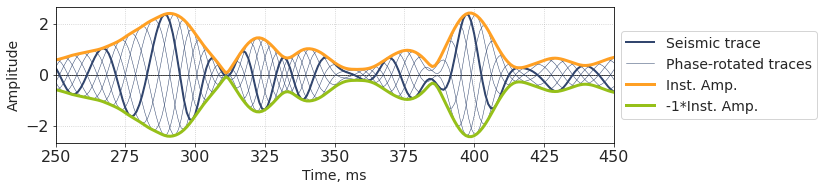

In [14]:
from scipy.fftpack import fft, ifft, fftfreq

AS = np.abs(fft(trace))
PS = np.angle(fft(trace))

PS_sh = np.zeros_like(PS)
AS_sh = np.zeros_like(AS)
phase_step = 60

f, ax = plt.subplots(figsize = [10, 2.5])

for i, phshift in enumerate(range(-180, 180, phase_step)):
    PS_sh[1:NSamples//2] = PS[1:NSamples//2] + pi*phshift/180
    PS_sh[NSamples//2+1:] = PS[NSamples//2+1:] - pi*phshift/180
    trc_sh = np.real_if_close(ifft(AS * exp(1j*PS_sh)))
    plt.plot(t, trc_sh, c = '#32466e', lw = 0.5)

plt.plot(t, trace, label = 'Seismic trace')
plt.plot(t, trace, c = '#32466e', lw = 0.5, label = 'Phase-rotated traces')
plt.plot(t, inst_amp, label = 'Inst. Amp.', lw = 3)
plt.plot(t, -1*inst_amp, label = '-1*Inst. Amp.', lw = 3)

plt.xlabel('Time, ms')
plt.ylabel('Amplitude')
plt.legend(bbox_to_anchor=(1.00,0.5), loc="center left")
plt.axhline(0, lw=1, c='#333333', zorder = 0)
plt.xlim(250,450)

plt.show()

### Instantaneous phase

Instantaneous phase, by definition, is the phase, or argument, of the complex trace:

$$
\mathrm{IP} = \arg(z) = \arctan{\frac{y}{x}}
$$


The instantaneous phase is 0° at peaks, 180° at troughs, ±90° at zero crossings.

In [15]:
inst_phase = np.angle(complex_trace)

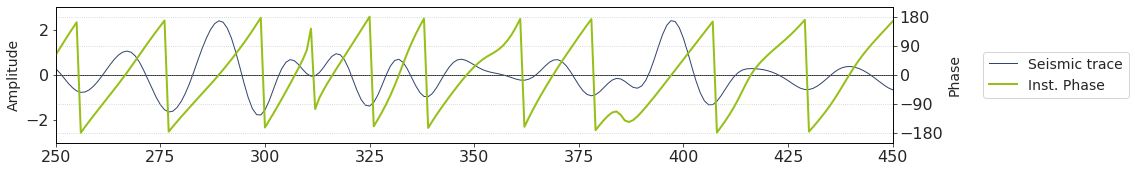

In [16]:
f, ax = plt.subplots(figsize = [15, 2.5])

ax.plot(t, trace, label = 'Seismic trace', lw = 1)
ax.plot([], [], c='#96c019', label = 'Inst. Phase')
ax.set_ylabel('Amplitude')
ax.grid(False)
ax.set_ylim(-3,3)
ax.legend(bbox_to_anchor=(1.1,0.5), loc="center left")

ax2 = ax.twinx()
ax2.plot(t, 180*inst_phase/np.pi, c='#96c019')
ax2.set_xlabel('Time, ms')
ax2.set_ylabel('Phase')
ax2.set_yticks(np.arange(-180, 181, 90))
ax2.set_ylim(-210, 210)

ax2.axhline(0, lw=1, c='#333333', zorder = 0)

plt.xlim(250,450)

plt.show()

#### Unwrapped instantaneous phase

As we can see, due to the $2\pi$ periodicity of $\mathrm{arctan}$, phase values are constrained within interval $[ -180°,-180°)$. It causes discontinuities and sawtooth-like appearance of this attribute. For some mathematical purposes, *unwrapped* instantaneous phase may be more applicable. But when it comes to vusial interpretation of seismic sections, usually wrapped instantaneous phase is preferred.

In [17]:
unwr_inst_phase = np.unwrap(inst_phase)

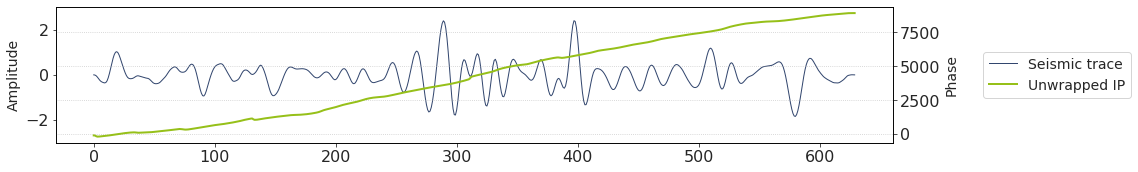

In [18]:
f, ax = plt.subplots(figsize = [15, 2.5])

ax.plot(t, trace, label = 'Seismic trace', lw = 1)
ax.plot([], [], c='#96c019', label = 'Unwrapped IP')
ax.set_ylabel('Amplitude')
ax.grid(False)
ax.set_ylim(-3,3)
ax.legend(bbox_to_anchor=(1.1,0.5), loc="center left")

ax2 = ax.twinx()
ax2.plot(t, 180*unwr_inst_phase/np.pi, c='#96c019')
ax2.set_xlabel('Time, ms')
ax2.set_ylabel('Phase')

# plt.xlim(200,450)

plt.show()

#### Cosine of instantaneous phase

In [19]:
cos_inst_phase = np.cos(inst_phase)

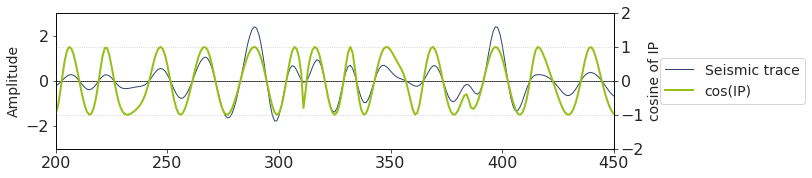

In [20]:
f, ax = plt.subplots(figsize = [10, 2.5])

ax.plot(t, trace, label = 'Seismic trace', lw = 1)
ax.plot([], [], c='#96c019', label = 'cos(IP)')
ax.set_ylabel('Amplitude')
ax.grid(False)
ax.set_ylim(-3, 3)
ax.legend(bbox_to_anchor=(1.07,0.5), loc="center left")

ax2 = ax.twinx()
ax2.plot(t, cos_inst_phase, c='#96c019')
ax2.set_xlabel('Time, ms')
ax2.set_ylabel('cosine of IP')
ax2.set_yticks(np.arange(-2, 3))
ax2.set_ylim(-2, 2)

ax2.axhline(0, lw=1, c='#333333', zorder = 0)
plt.xlim(200,450)

plt.show()

Extrema of this attribute roughly coincide with trace extrema, except their amplitude is ±1. We can think of this attribute as a special type of gain equalizer.

Product of envelope and cosine of instantaneous phase equals to the initial seismic trace.

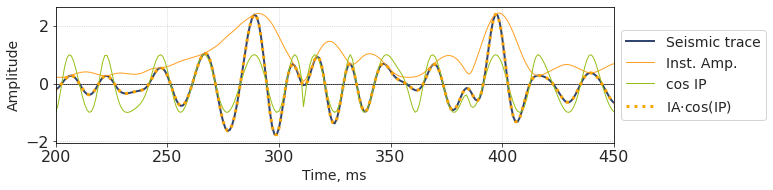

In [21]:
f, ax = plt.subplots(figsize = [10, 2.5])

plt.plot(t, trace, label = 'Seismic trace', lw = 2)
plt.plot(t, inst_amp, label = 'Inst. Amp.', lw = 1)
plt.plot(t, cos_inst_phase, lw = 1, label = 'cos IP')
plt.plot(t, cos_inst_phase * inst_amp, ls = ':', lw = 3, label = 'IA$\cdot$cos(IP)', c = 'orange')
plt.xlabel('Time, ms')
plt.ylabel('Amplitude')
plt.xlim(200, 450)
plt.legend(bbox_to_anchor=(1.00,0.5), loc="center left")
plt.axhline(0, lw=1, c='#333333', zorder = 0)
plt.show()

This implies a curious way of phase rotation. We can multiply a trace by cosine of _shifted_ instantaneous phase!

Let's test with 60° (π/3) rotation:

In [22]:
phase_shifted_trace = np.cos(inst_phase + np.pi/3) * inst_amp

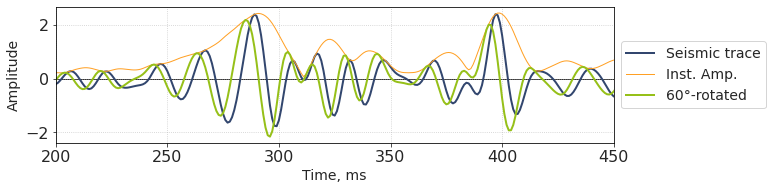

In [23]:
f, ax = plt.subplots(figsize = [10, 2.5])

plt.plot(t, trace, label = 'Seismic trace', lw = 2)
plt.plot(t, inst_amp, label = 'Inst. Amp.', lw = 1)

plt.plot(t, phase_shifted_trace, lw = 2, label = '60°-rotated')
plt.xlabel('Time, ms')
plt.ylabel('Amplitude')
plt.xlim(200, 450)
plt.legend(bbox_to_anchor=(1.00,0.5), loc="center left")
plt.axhline(0, lw=1, c='#333333', zorder = 0)
plt.show()

### Instantaneous frequency

Instantaneous frequency is the scaled derivative of instantaneous phase.

$$
\mathrm{IF} = \frac{1}{2\pi} \frac{d(\mathrm{IP})}{dt}
$$

Phase unwrapping should be performed prior to calculating the instantaneous frequency. Without it, the derivative is spiky and instantaneous frequency is not so illustrative.

Another fact is that discrete derivative `np.diff` returns an array that is one sample shorter than the input data. Thus, to preserve the length of trace, we need to add a zero value to either edge of array.

In [24]:
inst_freq = np.zeros_like(trace)
inst_freq[1:] = (1/(2*pi)) * (np.diff(unwr_inst_phase)/(dt/1000))

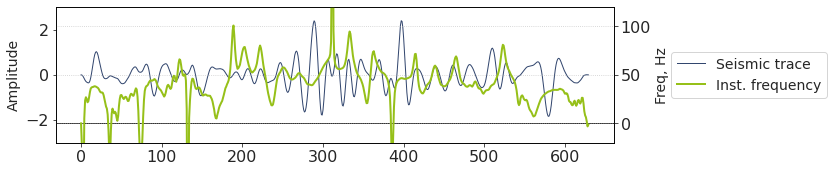

In [25]:
f, ax = plt.subplots(figsize = [10, 2.5])

ax.plot(t, trace, label = 'Seismic trace', lw = 1)
ax.plot([], [], c='#96c019', label = 'Inst. frequency')
ax.set_ylabel('Amplitude')
ax.grid(False)
ax.set_ylim(-3, 3)
ax.legend(bbox_to_anchor=(1.09,0.5), loc="center left")

ax2 = ax.twinx()
ax2.plot(t, inst_freq, c='#96c019')
ax2.set_xlabel('Time, ms')
ax2.set_ylabel('Freq, Hz')
# ax2.set_yticks(np.arange(-2, 3))
ax2.set_ylim(-20, 120)
# plt.xlim(200, 450)

ax2.axhline(0, lw=1, c='#333333', zorder = 0)

plt.show()

Instantaneous frequency is corrupted by large spikes which can be positive and negative. As much as they obstruct interpretation, they can sometimes be used as an indicator of stratigraphic discontinuities.

### Other attributes

There are plenty of derived attributes of complex trace, such as sweetness, instantaneous bandwidth, apparent polarity and so on. If interested, we'd recommend a description in [[Barnes, 2016]](https://library.seg.org/doi/book/10.1190/1.9781560803324).

## Appendix A: Complex trace spectrum

What does the Fourier spectrum of the complex trace look like? 



In [26]:
from scipy.fftpack import fft, ifft, fftfreq, fftshift

In [27]:
# trace spectrum
T_S = fft(trace)
T_AS = np.abs(T_S)
T_PS = np.angle(T_S)

# quadrature trace spectrum
QT_S = fft(quadr_trace)
QT_AS = np.abs(QT_S)
QT_PS = np.angle(QT_S)

# complex trace spectrum
CT_S = fft(complex_trace)
CT_AS = np.abs(CT_S)
CT_PS = np.angle(CT_S)

freq = fftfreq(NSamples, dt*0.001)

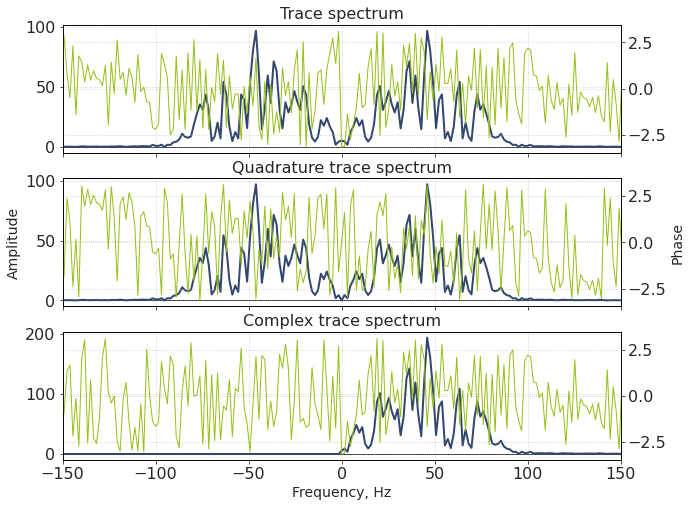

In [28]:
f, [ax0_0, ax1_0, ax2_0] = plt.subplots(3,1, figsize = [10, 8], sharex = True)

[ax0_1, ax1_1, ax2_1] = [axi.twinx() for axi in [ax0_0, ax1_0, ax2_0]]


ax0_0.set_title('Trace spectrum')
ax0_0.plot(fftshift(freq), fftshift(T_AS))
ax0_1.plot(fftshift(freq), fftshift(T_PS), c='#96c019', lw = 1)


ax1_0.set_title('Quadrature trace spectrum')
ax1_0.plot(fftshift(freq), fftshift(QT_AS))
ax1_1.plot(fftshift(freq), fftshift(QT_PS), c='#96c019', lw = 1)

ax1_0.set_ylabel('Amplitude')
ax1_1.set_ylabel('Phase')

ax2_0.set_title('Сomplex trace spectrum')
ax2_0.plot(fftshift(freq), fftshift(CT_AS))
ax2_1.plot(fftshift(freq), fftshift(CT_PS), c='#96c019', lw = 1)

[axi.axhline(0, lw=1, c='#333333', zorder = 0) for axi in [ax0_0, ax1_0, ax2_0]]
ax2_0.set_xlabel('Frequency, Hz')
ax0_0.set_xlim(-150,150);

What do we see?

1. Since a complex trace is complex-valued, its spectra sould be (and indeed is) asymmetric
2. What is more, it has no negative frequencies (and their phase is therefore meaningless)
3. Its positive part equals to the positive part of the initial trace spectrum


## Appendix B: Phase acceleration

As an experiment, it may be interesting to perform 'phase acceleration', or 'phase multiplication'. It is an artificial technique that is sometimes used to increase number of peaks and troughs in data. As an addition, this broadens the spectrum. More informaton can be found in [[Stark, 2009]](https://library.seg.org/doi/10.1190/1.3255039), [[Liang, 2017]](https://library.seg.org/doi/10.1190/geo2015-0572.1)


Recall the seismic trace can be represented as:

$$
f(t) = \mathrm{IA} \cdot \cos(\mathrm{IP}) $
$$

_n_-times accelerated trace is created as follows:

$$
f_n (t) = \mathrm{IA} \cdot \cos(n \cdotp \mathrm{IP})
$$

If the unwrapped version of phase is used, N can even be non-integer or less than 1.

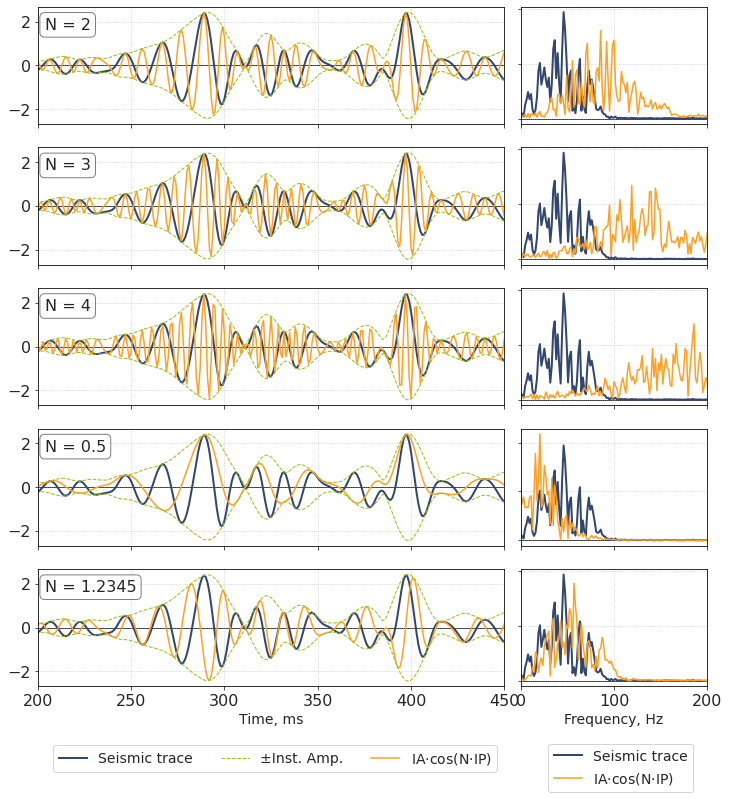

In [29]:
n_acc = [2, 3, 4, 0.5, 1.2345]

f, axs = plt.subplots(len(n_acc), 2, figsize = [12, 2.5*len(n_acc)], sharex = 'col', gridspec_kw = {'width_ratios': [5, 2], 'wspace':0.05})

for iax, axi in enumerate(axs):

    ht, = axi[0].plot(t, trace, lw = 2)
    ntrace = np.cos(n_acc[iax]*unwr_inst_phase) * inst_amp
    hnt, = axi[0].plot(t, ntrace, lw = 1.5)
    hia, = axi[0].plot(t, inst_amp, lw = 1, ls = '--')
    hia2, = axi[0].plot(t, -inst_amp, lw = 1, ls = '--', c='#96c019')
    
    axi[0].set_xlim(200, 450)
    axi[0].axhline(0, lw=1, c='#333333', zorder = 0)
    
    axi[0].annotate('N = {0}'.format(n_acc[iax]), (0.015, 0.91),  xycoords = 'axes fraction', ha = 'left', va = 'top',
        bbox={'facecolor': 'w', 'alpha': 0.5, 'boxstyle': 'Round'})
    
    
    hst, = axi[1].plot(fftshift(freq), fftshift(np.abs(fft(trace))), lw = 2)
    hsht, = axi[1].plot(fftshift(freq), fftshift(np.abs(fft(ntrace))), lw = 1.5)
    axi[1].axhline(0, lw=1, c='#333333', zorder = 0)
    axi[1].set_xlim([0, 200])
    axi[1].yaxis.set_ticklabels([])
    
axi[1].set_xlabel('Frequency, Hz')
axi[0].set_xlabel('Time, ms')
    
    
f.legend([ht, hia, hnt],
         ['Seismic trace', '±Inst. Amp.', 'IA$\cdot$cos(N$\cdot$IP)'],
         loc="lower center",
         bbox_to_anchor=(0.15, 0.022, 0.5, 0.05),
         ncol = 3
         )

f.legend([hst, hsht],
         ['Seismic trace', 'IA$\cdot$cos(N$\cdot$IP)'],
         loc="lower center",
         bbox_to_anchor=(0.55, 0.0, 0.5, 0.05),
         ncol = 1
         )

plt.show()

We see that the trace envelope stays unchanged, but the frequencies change significantly.

For integer values of N, locations of the initial trace maxima correspond to some accelerated trace maxima.

A very interesting phenomenon can be observed if we sum together accelerated traces for several values of N. Let's try for N from 1 to 6.

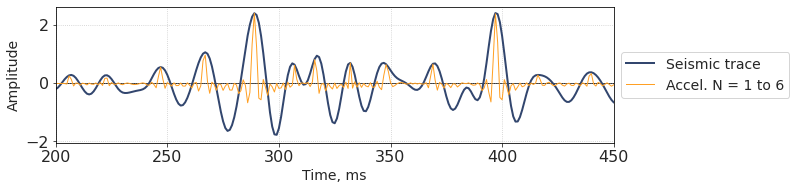

In [30]:
n_acc = [1, 2, 3, 4, 5, 6]

ntrace = np.zeros_like(trace)

for i, nn in enumerate(n_acc):
    ntrace = ntrace + np.cos(nn * unwr_inst_phase) * inst_amp

ntrace = ntrace / len(n_acc)  # normalization

f, ax = plt.subplots(figsize = [10, 2.5])
    
plt.plot(t, trace, label = 'Seismic trace', lw = 2)
plt.plot(t, ntrace, lw = 1, label = 'Accel. N = 1 to 6')

plt.xlabel('Time, ms')
plt.ylabel('Amplitude')
plt.xlim(200, 450)
plt.legend(bbox_to_anchor=(1.00,0.5), loc="center left")
plt.axhline(0, lw=1, c='#333333', zorder = 0)
plt.show()

As we can see, this is an attribute that 'thins' the positive extrema of the trace.

Same technique can be utilized to 'thin' the negative extrema. To achieve that, the trace first should be negated (we can do that by shifting the phase by π), and then the N-accelerated trace should be inverted back.

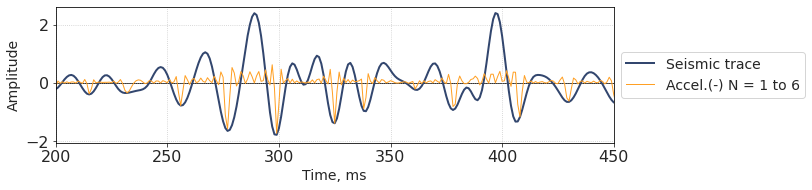

In [31]:
neg_ntrace = np.zeros_like(trace)

for i, nn in enumerate(n_acc):
    neg_ntrace = neg_ntrace + np.cos(nn * (unwr_inst_phase + np.pi)) * inst_amp

neg_ntrace = -1*neg_ntrace / len(n_acc) # normalization
    
f, ax = plt.subplots(figsize = [10, 2.5])

plt.plot(t, trace, label = 'Seismic trace', lw = 2)
plt.plot(t, neg_ntrace, lw = 1, label = 'Accel.(-) N = 1 to 6')

plt.xlabel('Time, ms')
plt.ylabel('Amplitude')
plt.xlim(200, 450)
plt.legend(bbox_to_anchor=(1.00,0.5), loc="center left")
plt.axhline(0, lw=1, c='#333333', zorder = 0)
plt.show()

Sum of 'positive' and 'negative' N-phase-accelerated traces is supposed to have a higher visible 'resolution' and a broader bandwidth than the original trace.

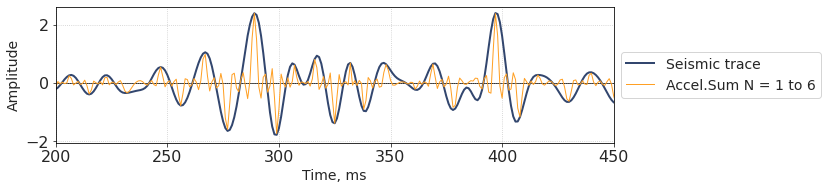

In [32]:
f, ax = plt.subplots(figsize = [10, 2.5])

plt.plot(t, trace, label = 'Seismic trace', lw = 2)
plt.plot(t, ntrace + neg_ntrace, lw = 1, label = 'Accel.Sum N = 1 to 6')

plt.xlabel('Time, ms')
plt.ylabel('Amplitude')

plt.xlim(200, 450)
plt.legend(bbox_to_anchor=(1.00,0.5), loc="center left")
plt.axhline(0, lw=1, c='#333333', zorder = 0)

plt.show()

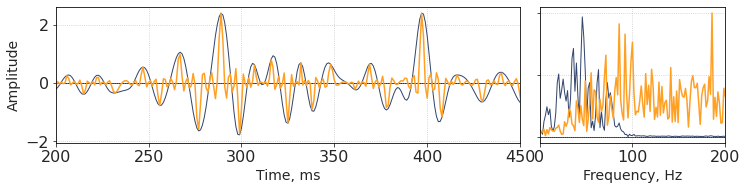

In [33]:
f, axs = plt.subplots(1, 2, figsize = [12, 2.5], gridspec_kw = {'width_ratios': [5, 2], 'wspace': 0.06})

axs[0].plot(t, trace, lw = 1)
axs[0].plot(t, ntrace+neg_ntrace, lw = 1.5)


axs[0].set_xlim(200, 450)
axs[0].axhline(0, lw=1, c='#333333', zorder = 0)
axs[0].set_xlabel('Time, ms')
axs[0].set_ylabel('Amplitude')

axs[1].plot(fftshift(freq), fftshift(np.abs(fft(trace))), lw = 1)
axs[1].plot(fftshift(freq), 3*fftshift(np.abs(fft(ntrace-neg_ntrace))), lw = 1.5)
axs[1].set_xlim([0, 200])
axs[1].yaxis.set_ticklabels([])
axs[1].set_xlabel('Frequency, Hz')
axs[1].axhline(0, lw=1, c='#333333', zorder = 0)

plt.show()

1. The spectrum became much broader;
2. This has no physical meaning and makes no geological sense;
3. However, this attribute might highlight some features on seismic sections;
4. This is pretty close to highlighting the local extrema.

## Main question ❔
The main question (to me it stays unanswered) is: why this works? Why do we get something that curls up so cool by simply adding 90°-rotated trace as an imaginary part to the real trace? Why is it informative? Are there other such transfomations?

## Related topics 🔗

- Discrete Fourier Transform
- Synthetic trace

___
<sub>Created on Dec 17, 2021</sub>

<sub>Modified on May 5, 2022</sub>